# Treadmill Maximal Exercise Tests
Link: https://physionet.org/content/treadmill-exercise-cardioresp/1.0.1/


## Import Libraries

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

## Read the datasets - Subject Infromation An Test Measure

### Subject Information Dataset

In [64]:
subject_i = pd.read_csv("subject-info.csv")
print(subject_i.shape)
subject_i.head()

(992, 8)


Age  Weight  Height  Humidity  Temperature  Sex   ID ID_test
0  10.8    48.8   163.0      39.0         20.7    1  543   543_1
1  11.8    41.0   150.0      41.0         22.3    1   11    11_1
2  12.2    46.0   160.0      37.0         21.5    0  829   829_1
3  13.2    71.0   190.0      49.0         23.8    1  284   284_1
4  13.7    53.8   169.7      40.0         25.3    0  341   341_1

In [65]:
# Information about the Dataset
subject_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          992 non-null    float64
 1   Weight       992 non-null    float64
 2   Height       992 non-null    float64
 3   Humidity     962 non-null    float64
 4   Temperature  962 non-null    float64
 5   Sex          992 non-null    int64  
 6   ID           992 non-null    int64  
 7   ID_test      992 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 62.1+ KB


In [107]:
# There are 857 uniques 'ID'  and 992 unique 'ID_test' in the subject_i dataset
print("ID Count:",subject_i['ID'].nunique())
print("ID_test Count:", subject_i['ID_test'].nunique())

ID Count: 857
ID_test Count: 992


### Test Measure Dataset

In [66]:
test_m = pd.read_csv("test_measure.csv")
print(test_m.shape)
test_m.head()

(575087, 9)


time  Speed  HR    VO2   VCO2    RR    VE ID_test  ID
0     0    0.0 NaN  198.0  233.0  15.0   8.9     1_1   1
1     4    0.0 NaN  286.0  328.0  16.0  10.9     1_1   1
2    10    0.0 NaN  245.0  258.0  10.0   7.9     1_1   1
3    14    0.0 NaN  234.0  252.0  11.0   8.2     1_1   1
4    19    0.0 NaN  250.0  271.0  12.0   8.9     1_1   1

In [67]:
# Information about the Dataset
test_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575087 entries, 0 to 575086
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   time     575087 non-null  int64  
 1   Speed    575087 non-null  float64
 2   HR       573985 non-null  float64
 3   VO2      570215 non-null  float64
 4   VCO2     570181 non-null  float64
 5   RR       555303 non-null  float64
 6   VE       575070 non-null  float64
 7   ID_test  575087 non-null  object 
 8   ID       575087 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 39.5+ MB


In [108]:
# There are 857 uniques 'ID'  and 992 unique 'ID_test' in the test_m dataset
print("ID Count:",test_m['ID'].nunique())
print("ID_test Count:", test_m['ID_test'].nunique())

ID Count: 857
ID_test Count: 992


### Make copies of the dataframes subject_i and test_m to work on the questions. This will help avoid challenges while merging the notebooks.

In [68]:
#Make a dupicate dataframes to work on the questions
subject_df = subject_i
test_df= test_m

In [69]:
subject_df['Sex'].replace(0,'Male',inplace=True)
subject_df['Sex'].replace(1,'Female',inplace=True)

In [70]:
subject_df.head(10)

Age  Weight  Height  Humidity  Temperature     Sex   ID ID_test
0  10.8    48.8   163.0      39.0         20.7  Female  543   543_1
1  11.8    41.0   150.0      41.0         22.3  Female   11    11_1
2  12.2    46.0   160.0      37.0         21.5    Male  829   829_1
3  13.2    71.0   190.0      49.0         23.8  Female  284   284_1
4  13.7    53.8   169.7      40.0         25.3    Male  341   341_1
5  13.8    53.4   171.0      42.0         24.4    Male  341   341_2
6  14.0    46.0   160.0      40.0         25.3    Male  343   343_1
7  14.1    50.0   168.9      42.0         24.2    Male  330   330_1
8  14.1    47.2   160.2      40.0         25.2    Male  338   338_1
9  14.1    49.7   160.1      40.0         25.8    Male  339   339_1

### 65. Calculate the percentage of male athletes who exceeded, the maximum treadmill speed of female athletes.

In [71]:

Speed  = test_df.groupby('ID')
# taking max speed of the ID
max_speed = Speed['Speed'].max().reset_index()
max_speed.columns = ['ID', 'MaxSpeed']
max_speed['Sex'] = subject_i['Sex']
max_speed.head()

ID  MaxSpeed     Sex
0   1      18.1  Female
1   2      16.3  Female
2   3      18.1    Male
3   4      16.2  Female
4   5      14.4    Male

In [72]:
# Extracting the speed values of the female athletes as a list
female_speed = max_speed[max_speed['Sex'] =='Female']['MaxSpeed'].tolist()
#print(len(female_max_speed))   138
#print(min(female_speed))  7
#print(max(female_speed)) 21.8

In [73]:
#Extracting the speed values of the male athletes as a list
male_speed = max_speed[max_speed['Sex'] =='Male']['MaxSpeed'].tolist()
#print(len(male_speed)) 719
#print(min(male_speed)) 8.5
#print(max(male_speed)) 23.1

In [74]:
#extracting the number of males whose speed is more than 12.94 which is the maximun speed of female athletes
males_greater_than_female_maxspeed = [num for num in male_speed if num > max(female_speed)]
males_greater_than_female_maxspeed # 4 males have  speed more than max. average speed of females

[22.7, 21.9, 23.1, 22.1]

### Final Solution to #65

In [75]:
# To calculate the percentage of male athletes who exceeded, the maximum treadmill speed of female athletes. 
# method 1: if we want only the %of males out of total males
perc1 = (len(males_greater_than_female_maxspeed)/ len(male_speed))* 100

#method2: if we want the %of males out of total males + total females
perc2 = (len(males_greater_than_female_maxspeed)/ (len(male_speed) + len(female_speed)))* 100

print("The % of males out of only the total males who exceeded the maximum treadmill speed of female athletes is", round(perc1,2))
print("The % of males out of total population who exceeded the maximum treadmill speed of female athletes is",round(perc2,2))

The % of males out of only the total males who exceeded the maximum treadmill speed of female athletes is 0.56
The % of males out of total population who exceeded the maximum treadmill speed of female athletes is 0.47


### 66. Visualize the number of test taken by participants and their trend of maximum Vo2 level as dual chart ?

In [76]:
#number of test taken by participants
testcount = test_df.groupby('ID')['ID_test'].nunique().reset_index()
testcount.columns = ['ID', 'testCounts']

In [77]:
# maximum Vo2 level
vo2max = test_df.groupby('ID')['VO2'].max().reset_index()
vo2max.columns = ['ID', 'Vo2Max']

In [78]:
participants_max_vo2 = pd.merge(testcount, vo2max, on='ID')
participants_max_vo2.head()

ID  testCounts  Vo2Max
0   1           1  3267.0
1   2           1  2833.0
2   3           1  3692.0
3   4           1  4110.0
4   5           1  4053.0

In [79]:
#max(participants_max_vo2['testCounts']) #5
#len(participants_max_vo2) #857

In [80]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs= [[{"secondary_y" :True}]])

fig.add_trace(
            go.Scatter(x = participants_max_vo2["ID"], y = participants_max_vo2['Vo2Max'], name = "Max VO2 Values", mode='markers'),
            secondary_y =True
)

fig.add_trace(
            go.Scatter(x = participants_max_vo2["ID"], y = participants_max_vo2['testCounts'], name = "Test Counts", mode='markers',opacity=0.5),
            secondary_y =False
)


fig.update_layout(title_text = "Test Counts with Maximum VO2 Values", title_x =0.5)
fig.update_xaxes(title_text = "ID")
fig.update_yaxes(title_text = "testCounts", secondary_y =False)
fig.update_yaxes(title_text = "Oxygen Consumption", secondary_y =True)


fig.show()

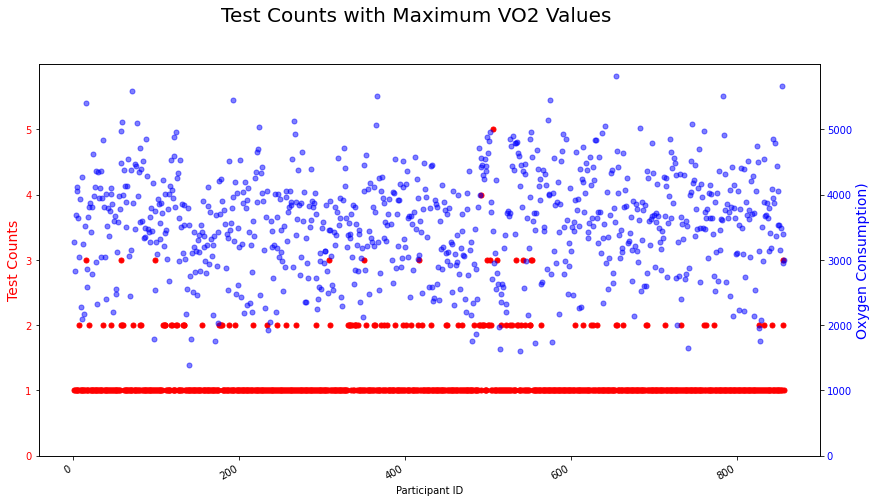

In [81]:
COLOR_1 = "red"
COLOR_2 = "blue"

fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()

ax1.scatter(x = participants_max_vo2["ID"], y = participants_max_vo2['testCounts'],  color=COLOR_1, s= 25)
ax2.scatter(x = participants_max_vo2["ID"], y = participants_max_vo2['Vo2Max'], color=COLOR_2, alpha= 0.5, s=25)


ax1.set_xlabel("Participant ID")
ax1.set_ylabel("Test Counts", color=COLOR_1, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_1)
ax1.set_ylim([0, 6]) # Set y limit for second y axis
ax1.set_yticks(np.arange(0, 6, 1)) # Set increments for second y axis


ax2.set_ylabel("Oxygen Consumption)", color=COLOR_2, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_2)
ax2.set_ylim([0, 6000]) # Set y limit for second y axis
ax2.set_yticks(np.arange(0, 6000, 1000)) # Set increments for second y axis

fig.suptitle("Test Counts with Maximum VO2 Values", fontsize=20)
fig.autofmt_xdate()

plt.show()

### 67. Create violin chart for any two column from the dataset ?

In [82]:
#Age Category
def age_category(df):
    if df['Age'] > 10 and df['Age'] < 13: 
        return 'Child'
    if df['Age'] >= 13 and df['Age'] < 20: 
        return 'Teen'
    if df['Age'] >= 20 and df['Age'] < 60: 
        return 'Adult'
    if df['Age'] >= 60 : 
        return 'Senior'

subject_df['Age Category'] = subject_df.apply(lambda x : age_category(x), axis = 1)
subject_df.head()

Age  Weight  Height  Humidity  Temperature     Sex   ID ID_test  \
0  10.8    48.8   163.0      39.0         20.7  Female  543   543_1   
1  11.8    41.0   150.0      41.0         22.3  Female   11    11_1   
2  12.2    46.0   160.0      37.0         21.5    Male  829   829_1   
3  13.2    71.0   190.0      49.0         23.8  Female  284   284_1   
4  13.7    53.8   169.7      40.0         25.3    Male  341   341_1   

  Age Category  
0        Child  
1        Child  
2        Child  
3         Teen  
4         Teen

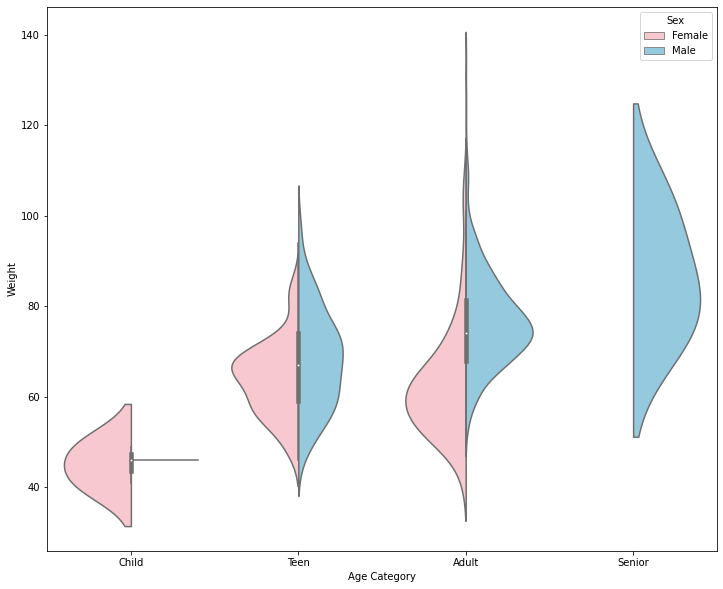

In [83]:
fig =plt.figure(figsize =(12,10))
palette_dict = {'Male': 'Skyblue', 'Female': 'Pink'}
sns.violinplot(x='Age Category' ,y='Weight',data=subject_df, hue='Sex', palette=palette_dict ,split=True)
plt.show()

### 68. Calculate BSA (Body surface area) without using function and store as column in dataframe and categorize.

In [84]:
# Using the most commonly used formula "Du Bois Formula:BSA (m²) = 0.007184 x (Height (cm) ^ 0.725) x (Weight (kg) ^ 0.425)."
#subject_df['BSA'] = round((0.007184 * (subject_df['Height']**0.725) * (subject_df['Weight']**0.425)),2)

subject_df['BSA'] = round(np.sqrt(subject_df['Height']*subject_df['Weight']/3600), 2)

# Categorize BSA
def categorize_bsa(bsa):
    if bsa < 1.6:
        return 'Low'
    elif 1.6 <= bsa < 2.0:
        return 'Average'
    else:
        return 'High'

subject_df['bsa_category'] = subject_df['BSA'].apply(categorize_bsa)

subject_df.head(15)

Age  Weight  Height  Humidity  Temperature     Sex   ID ID_test  \
0   10.8    48.8   163.0      39.0         20.7  Female  543   543_1   
1   11.8    41.0   150.0      41.0         22.3  Female   11    11_1   
2   12.2    46.0   160.0      37.0         21.5    Male  829   829_1   
3   13.2    71.0   190.0      49.0         23.8  Female  284   284_1   
4   13.7    53.8   169.7      40.0         25.3    Male  341   341_1   
5   13.8    53.4   171.0      42.0         24.4    Male  341   341_2   
6   14.0    46.0   160.0      40.0         25.3    Male  343   343_1   
7   14.1    50.0   168.9      42.0         24.2    Male  330   330_1   
8   14.1    47.2   160.2      40.0         25.2    Male  338   338_1   
9   14.1    49.7   160.1      40.0         25.8    Male  339   339_1   
10  14.1    46.6   161.5      41.0         26.5    Male  343   343_5   
11  14.2    65.2   170.1      42.0         24.4    Male  333   333_1   
12  14.2    64.6   175.0      42.0         24.4    Male  335   335_1   
13  14.2    51.0   163.0      42.0         24.4    Male  339   339_5   
14  14.2    57.8   164.2      40.0         25.8    Male  344   344_1   

   Age Category   BSA bsa_category  
0         Child  1.49          Low  
1         Child  1.31          Low  
2         Child  1.43          Low  
3          Teen  1.94      Average  
4          Teen  1.59          Low  
5          Teen  1.59          Low  
6          Teen  1.43          Low  
7          Teen  1.53          Low  
8          Teen  1.45          Low  
9          Teen  1.49          Low  
10         Teen  1.45          Low  
11         Teen  1.76      Average  
12         Teen  1.77      Average  
13         Teen  1.52          Low  
14         Teen  1.62      Average

### 69. Write a python function that efficiently processes large data into chunks to analyze average heart rate and maximum oxygen consumption for each test. Print the chunks during processing.

In [85]:
def treadmill_data(filename, chunk_size= 2000):
    
    print(f"Processing Data in Chunks of {chunk_size} rows...")
    print("---------------------------------------------------")
    for chunk in pd.read_csv(filename, chunksize = chunk_size):
        print("Processing data chunks:")
        print(chunk.head())
        test_ids = chunk['ID_test'].unique()

        for test_id in test_ids:
            test_data = chunk[chunk['ID_test'] == test_id]
            # calculate average heart rate and maximum oxygen consumption 
            avg_heart_rate = test_data['HR'].mean(skipna=True)
            max_oxygen_consumption = test_data['VO2'].max()
            print("\n")
            print(f"Test ID: {test_id}")
            print(f"average heart rate: {avg_heart_rate:.2f}")
            print(f"maximum oxygen consumption: {max_oxygen_consumption:.2f}")
        
        print("-----------------------------------------------------------------")


treadmill_data('test_measure.csv', chunk_size=2000)

Processing Data in Chunks of 2000 rows...
---------------------------------------------------
Processing data chunks:
   time  Speed  HR  VO2   VCO2    RR    VE ID_test  ID
0     0    0.0 NaN  198  233.0  15.0   8.9     1_1   1
1     4    0.0 NaN  286  328.0  16.0  10.9     1_1   1
2    10    0.0 NaN  245  258.0  10.0   7.9     1_1   1
3    14    0.0 NaN  234  252.0  11.0   8.2     1_1   1
4    19    0.0 NaN  250  271.0  12.0   8.9     1_1   1


Test ID: 1_1
average heart rate: 132.68
maximum oxygen consumption: 3267.00


Test ID: 10_1
average heart rate: 158.00
maximum oxygen consumption: 4272.00


Test ID: 100_1
average heart rate: 133.68
maximum oxygen consumption: 3272.00


Test ID: 101_1
average heart rate: 140.32
maximum oxygen consumption: 2539.00
-----------------------------------------------------------------
Processing data chunks:
      time  Speed     HR   VO2  VCO2    RR    VE ID_test   ID
2000   570   11.7  167.0  2485  2576  32.0  71.1   101_1  101
2001   571   11.8  17



Test ID: 132_1
average heart rate: 165.95
maximum oxygen consumption: 3098.00


Test ID: 132_7
average heart rate: 166.86
maximum oxygen consumption: 2589.00


Test ID: 133_1
average heart rate: 158.44
maximum oxygen consumption: 3533.00
-----------------------------------------------------------------
Processing data chunks:
       time  Speed     HR   VO2  VCO2    RR    VE ID_test   ID
30000  1048    5.0  161.0  1386  1881  39.0  64.8   133_1  133
30001  1050    5.0  160.0  1376  1823  40.0  63.3   133_1  133
30002  1051    5.0  159.0  1375  1791  38.0  61.6   133_1  133
30003  1054    5.0  158.0  1401  1797  38.0  61.5   133_1  133
30004  1056    5.0  157.0  1381  1787  37.0  60.8   133_1  133


Test ID: 133_1
average heart rate: 147.61
maximum oxygen consumption: 1409.00


Test ID: 133_4
average heart rate: 159.41
maximum oxygen consumption: 2848.00


Test ID: 134_1
average heart rate: 153.91
maximum oxygen consumption: 3842.00


Test ID: 134_2
average heart rate: 155.49
maximum 

58004   877   16.8  185.0  2571  2671  45.0  76.2   173_1  173


Test ID: 173_1
average heart rate: 172.74
maximum oxygen consumption: 2899.00


Test ID: 174_1
average heart rate: 150.30
maximum oxygen consumption: 3433.00


Test ID: 175_1
average heart rate: 163.58
maximum oxygen consumption: 2038.00


Test ID: 176_1
average heart rate: 125.53
maximum oxygen consumption: 3536.00
-----------------------------------------------------------------
Processing data chunks:
       time  Speed   HR   VO2  VCO2    RR    VE ID_test   ID
60000   872   16.7  169  3440  3462  39.0  91.8   176_1  176
60001   874   16.7  170  3457  3491  39.0  92.5   176_1  176
60002   876   16.8  171  3457  3491  39.0  92.5   176_1  176
60003   878   16.8  172  3450  3492  39.0  93.2   176_1  176
60004   879   16.8  172  3524  3540  39.0  93.2   176_1  176


Test ID: 176_1
average heart rate: 157.74
maximum oxygen consumption: 3980.00


Test ID: 176_4
average heart rate: 124.00
maximum oxygen consumption: 4209.00



88004   546   11.1  170  2082  2280.0  41  73.1   215_1  215


Test ID: 215_1
average heart rate: 142.58
maximum oxygen consumption: 2204.00


Test ID: 216_1
average heart rate: 148.29
maximum oxygen consumption: 2818.00


Test ID: 217_1
average heart rate: 143.19
maximum oxygen consumption: 2871.00


Test ID: 217_38
average heart rate: 146.63
maximum oxygen consumption: 3592.00


Test ID: 218_1
average heart rate: 125.76
maximum oxygen consumption: 2713.00
-----------------------------------------------------------------
Processing data chunks:
       time  Speed   HR   VO2  VCO2    RR    VE ID_test   ID
90000   682    5.0  155  2130  2190  25.0  59.2   218_1  218
90001   684    5.0  155  2121  2217  26.0  59.7   218_1  218
90002   686    5.0  153  2057  2174  27.0  59.4   218_1  218
90003   689    5.0  151  2026  2157  27.0  60.3   218_1  218
90004   692    5.0  149  1938  2071  25.0  57.4   218_1  218


Test ID: 218_1
average heart rate: 166.94
maximum oxygen consumption: 3373.00




Processing data chunks:
        time  Speed   HR   VO2  VCO2    RR     VE ID_test   ID
118000   936   17.8  194  4019  4822  58.0  130.9   261_1  261
118001   937   17.8  194  4003  4824  59.0  131.7   261_1  261
118002   938   17.9  194  3971  4786  58.0  130.6   261_1  261
118003   939   17.9  194  3973  4796  59.0  131.3   261_1  261
118004   940   17.9  195  3930  4740  58.0  128.7   261_1  261


Test ID: 261_1
average heart rate: 156.44
maximum oxygen consumption: 4019.00


Test ID: 262_1
average heart rate: 147.68
maximum oxygen consumption: 3892.00


Test ID: 263_1
average heart rate: 164.08
maximum oxygen consumption: 3841.00


Test ID: 264_1
average heart rate: 170.30
maximum oxygen consumption: 4545.00


Test ID: 265_1
average heart rate: 137.14
maximum oxygen consumption: 1381.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed   HR   VO2  VCO2    RR    VE ID_test   ID
120000   252    6.4  151  1342  1132  32.0  37



Test ID: 306_1
average heart rate: 151.12
maximum oxygen consumption: 2832.00


Test ID: 307_1
average heart rate: 148.54
maximum oxygen consumption: 2287.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed   HR   VO2  VCO2    RR    VE ID_test   ID
146000   580   11.8  116  2234  2142  44.0  58.4   307_1  307
146001   581   11.8  116  2247  2159  44.0  58.4   307_1  307
146002   582   11.8  129  2243  2151  44.0  58.2   307_1  307
146003   584   11.9  146  2243  2151  44.0  58.2   307_1  307
146004   585   11.9  146  2267  2175  44.0  58.9   307_1  307


Test ID: 307_1
average heart rate: 170.75
maximum oxygen consumption: 2486.00


Test ID: 308_1
average heart rate: 138.47
maximum oxygen consumption: 3006.00


Test ID: 308_2
average heart rate: 137.83
maximum oxygen consumption: 3409.00


Test ID: 308_5
average heart rate: 139.13
maximum oxygen consumption: 3464.00
----------------------------------------------------------


Test ID: 343_1
average heart rate: 155.86
maximum oxygen consumption: 2837.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed   HR   VO2  VCO2    RR    VE ID_test   ID
178000   941   17.9  197  2789  3124   NaN  95.3   343_1  343
178001   942    5.0  197  2740  3066   NaN  94.6   343_1  343
178002   944    5.0  197  2724  3054   NaN  92.2   343_1  343
178003   945    5.0  196  2643  2968  58.0  89.2   343_1  343
178004   946    5.0  196  2607  2940  55.0  86.9   343_1  343


Test ID: 343_1
average heart rate: 148.39
maximum oxygen consumption: 2789.00


Test ID: 343_5
average heart rate: 159.86
maximum oxygen consumption: 2491.00


Test ID: 344_1
average heart rate: 154.99
maximum oxygen consumption: 3402.00


Test ID: 345_1
average heart rate: 143.89
maximum oxygen consumption: 3452.00


Test ID: 346_1
average heart rate: 135.49
maximum oxygen consumption: 2149.00
-----------------------------------------------------------



Test ID: 378_5
average heart rate: 152.37
maximum oxygen consumption: 3533.00


Test ID: 379_1
average heart rate: 159.31
maximum oxygen consumption: 3695.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed     HR     VO2    VCO2  RR    VE ID_test   ID
206000   872    5.0  150.0  1721.0  1849.0  46  71.3   379_1  379
206001   873    5.0  150.0  1665.0  1793.0  47  69.6   379_1  379
206002   874    5.0  150.0  1643.0  1772.0  47  69.6   379_1  379
206003   876    5.0  149.0  1622.0  1767.0  49  70.4   379_1  379
206004   877    5.0  148.0  1578.0  1718.0  48  69.2   379_1  379


Test ID: 379_1
average heart rate: 143.11
maximum oxygen consumption: 1771.00


Test ID: 38_1
average heart rate: 159.40
maximum oxygen consumption: 3047.00


Test ID: 380_1
average heart rate: 147.34
maximum oxygen consumption: nan


Test ID: 381_1
average heart rate: 164.46
maximum oxygen consumption: 3933.00


Test ID: 382_1
average heart rate: 14



Test ID: 417_37
average heart rate: 148.68
maximum oxygen consumption: 2327.00


Test ID: 417_55
average heart rate: 137.33
maximum oxygen consumption: 3082.00


Test ID: 418_1
average heart rate: 156.83
maximum oxygen consumption: 3592.00


Test ID: 419_1
average heart rate: 141.36
maximum oxygen consumption: 3429.00


Test ID: 42_1
average heart rate: 103.39
maximum oxygen consumption: 2292.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed   HR   VO2  VCO2    RR    VE ID_test  ID
236000   417    9.1  124  2119  1681  38.0  51.1    42_1  42
236001   418    9.1  124  2059  1653  39.0  50.6    42_1  42
236002   420    9.2  124  2060  1653  39.0  50.6    42_1  42
236003   422    9.2  125  2060  1653  39.0  50.6    42_1  42
236004   423    9.2  126  2115  1673  37.0  49.9    42_1  42


Test ID: 42_1
average heart rate: 150.91
maximum oxygen consumption: 3790.00


Test ID: 420_1
average heart rate: 157.86
maximum oxygen consu



Test ID: 46_1
average heart rate: 131.48
maximum oxygen consumption: 4012.00


Test ID: 460_1
average heart rate: 152.46
maximum oxygen consumption: 3085.00


Test ID: 461_1
average heart rate: 144.65
maximum oxygen consumption: 2926.00


Test ID: 462_1
average heart rate: 115.66
maximum oxygen consumption: 2900.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed     HR   VO2  VCO2    RR     VE ID_test   ID
264000   632   11.7  154.0  2733  2676  52.0  100.6   462_1  462
264001   634   11.7  154.0  2817  2694  51.0   99.1   462_1  462
264002   635   11.7  154.0  2756  2657  51.0   97.7   462_1  462
264003   636   11.7  154.0  2843  2740  49.0   97.7   462_1  462
264004   638   11.8  154.0  2777  2726  49.0   97.2   462_1  462


Test ID: 462_1
average heart rate: 144.10
maximum oxygen consumption: 3388.00


Test ID: 463_1
average heart rate: 136.43
maximum oxygen consumption: 2972.00


Test ID: 464_1
average heart rate: 148.



Test ID: 499_1
average heart rate: 177.98
maximum oxygen consumption: 4864.00


Test ID: 499_37
average heart rate: 147.34
maximum oxygen consumption: 4886.00


Test ID: 499_48
average heart rate: 135.20
maximum oxygen consumption: 4846.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed     HR   VO2  VCO2    RR    VE ID_test   ID
296000  1245    5.0  112.0  1837  2311  34.0  67.9  499_48  499
296001  1247    5.0  112.0  1921  2391  33.0  69.4  499_48  499
296002  1248    5.0  111.0  1999  2474  35.0  72.9  499_48  499
296003  1250    5.0  111.0  1977  2417  35.0  71.0  499_48  499
296004  1251    5.0  111.0  1912  2342  37.0  69.7  499_48  499


Test ID: 499_48
average heart rate: 110.68
maximum oxygen consumption: 1999.00


Test ID: 5_1
average heart rate: 158.77
maximum oxygen consumption: 4053.00


Test ID: 50_1
average heart rate: 153.49
maximum oxygen consumption: 3667.00


Test ID: 500_1
average heart rate: 151.15
ma



Test ID: 533_1
average heart rate: 136.02
maximum oxygen consumption: 4788.00


Test ID: 534_1
average heart rate: 159.76
maximum oxygen consumption: 4551.00


Test ID: 534_23
average heart rate: 161.96
maximum oxygen consumption: 4793.00


Test ID: 534_32
average heart rate: 163.45
maximum oxygen consumption: 4380.00


Test ID: 535_1
average heart rate: 129.44
maximum oxygen consumption: 3374.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed   HR   VO2  VCO2  RR    VE ID_test   ID
328000   624   12.6  156  3304  2886  35  75.7   535_1  535
328001   626   12.6  156  3303  2886  35  75.7   535_1  535
328002   628   12.6  156  3367  2956  34  78.1   535_1  535
328003   629   12.7  156  3368  2956  34  78.1   535_1  535
328004   631   12.7  156  3296  2923  33  77.4   535_1  535


Test ID: 535_1
average heart rate: 161.05
maximum oxygen consumption: 4804.00


Test ID: 535_31
average heart rate: 143.83
maximum oxygen consumpt



Test ID: 564_1
average heart rate: 145.51
maximum oxygen consumption: 2524.00


Test ID: 564_98
average heart rate: 138.98
maximum oxygen consumption: 2634.00


Test ID: 565_1
average heart rate: 152.62
maximum oxygen consumption: 2660.00


Test ID: 566_1
average heart rate: 166.29
maximum oxygen consumption: 4376.00


Test ID: 567_1
average heart rate: 97.00
maximum oxygen consumption: 637.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed  HR  VO2  VCO2    RR    VE ID_test   ID
356000    27    6.1  97  626   588  13.0  17.2   567_1  567
356001    35    6.1  95  657   615  13.0  17.9   567_1  567
356002    37    6.1  95  672   625  14.0  18.3   567_1  567
356003    41    6.1  94  690   616  14.0  18.0   567_1  567
356004    44    6.1  93  720   621  14.0  18.2   567_1  567


Test ID: 567_1
average heart rate: 151.13
maximum oxygen consumption: 3436.00


Test ID: 568_1
average heart rate: 160.48
maximum oxygen consumption:

maximum oxygen consumption: 3919.00


Test ID: 605_6
average heart rate: 124.94
maximum oxygen consumption: 3794.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed   HR   VO2    VCO2    RR     VE ID_test   ID
386000  1055    4.9  164  2974  3543.0  37.0  101.2   605_6  605
386001  1057    4.9  163  2928  3523.0  36.0  101.5   605_6  605
386002  1059    4.9  163  2891  3468.0  36.0   98.5   605_6  605
386003  1060    4.9  162  2980  3526.0  36.0   97.0   605_6  605
386004  1062    4.9  160  3019  3542.0  35.0   95.6   605_6  605


Test ID: 605_6
average heart rate: 128.04
maximum oxygen consumption: 3044.00


Test ID: 606_1
average heart rate: 137.81
maximum oxygen consumption: 4649.00


Test ID: 607_1
average heart rate: 151.15
maximum oxygen consumption: 3765.00


Test ID: 608_1
average heart rate: 139.08
maximum oxygen consumption: 3934.00
-----------------------------------------------------------------
Processing data ch

Processing data chunks:
        time  Speed   HR   VO2    VCO2    RR    VE ID_test   ID
416000   503    9.5  181  2025  1876.0  24.0  44.7   647_1  647
416001   505    9.5  182  2004  1842.0  26.0  44.2   647_1  647
416002   509    9.5  182  2007  1879.0  24.0  45.6   647_1  647
416003   512    9.5  182  1926  1808.0  25.0  44.8   647_1  647
416004   514   10.1  182  1971  1851.0  25.0  46.2   647_1  647


Test ID: 647_1
average heart rate: 192.67
maximum oxygen consumption: 3680.00


Test ID: 648_1
average heart rate: 161.66
maximum oxygen consumption: 4332.00


Test ID: 649_1
average heart rate: 156.00
maximum oxygen consumption: 4384.00


Test ID: 65_1
average heart rate: 139.12
maximum oxygen consumption: 3728.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed     HR   VO2  VCO2    RR    VE ID_test  ID
418000   592   14.5  180.0  3712  4054  31.0  89.1    65_1  65
418001   594   14.5  180.0  3692  4050  31.0  88.5    65_



Test ID: 690_4
average heart rate: 146.53
maximum oxygen consumption: 2534.00


Test ID: 691_1
average heart rate: 161.48
maximum oxygen consumption: 4001.00


Test ID: 691_7
average heart rate: 146.28
maximum oxygen consumption: 4354.00


Test ID: 692_1
average heart rate: 165.15
maximum oxygen consumption: 2796.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed     HR   VO2  VCO2    RR    VE ID_test   ID
448000   816    4.9  145.0  1465  1603  26.0  63.9   692_1  692
448001   818    4.9  145.0  1447  1582  26.0  62.9   692_1  692
448002   820    4.9  145.0  1532  1662  27.0  66.0   692_1  692
448003   822    4.9  144.0  1506  1645  28.0  66.5   692_1  692
448004   824    4.9  144.0  1528  1685  30.0  70.4   692_1  692


Test ID: 692_1
average heart rate: 142.33
maximum oxygen consumption: 1532.00


Test ID: 693_1
average heart rate: 156.98
maximum oxygen consumption: 4249.00


Test ID: 694_1
average heart rate: 141.61
ma



Test ID: 729_1
average heart rate: 174.24
maximum oxygen consumption: 3267.00


Test ID: 73_1
average heart rate: 135.82
maximum oxygen consumption: nan


Test ID: 730_1
average heart rate: 125.07
maximum oxygen consumption: 2753.00


Test ID: 731_1
average heart rate: 157.34
maximum oxygen consumption: 4321.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed     HR   VO2  VCO2    RR    VE ID_test   ID
478000  1323    4.9  151.0  2134  2826  33.0  70.6   731_1  731
478001  1325    4.9  150.0  2097  2816  34.0  73.6   731_1  731
478002  1327    4.9  149.0  1968  2646  34.0  70.1   731_1  731
478003  1329    4.9  148.0  1969  2646  34.0  70.1   731_1  731
478004  1331    4.9  147.0  1882  2595  34.0  70.3   731_1  731


Test ID: 731_1
average heart rate: 133.45
maximum oxygen consumption: 2134.00


Test ID: 732_1
average heart rate: 148.11
maximum oxygen consumption: 3650.00


Test ID: 733_1
average heart rate: 142.41
maximum

504004  1003   18.6  200.0  4886  5280  43.0  144.8    77_1  77


Test ID: 77_1
average heart rate: 178.58
maximum oxygen consumption: 5097.00


Test ID: 770_1
average heart rate: 143.40
maximum oxygen consumption: 3637.00


Test ID: 771_1
average heart rate: 154.35
maximum oxygen consumption: 3395.00


Test ID: 772_1
average heart rate: 145.31
maximum oxygen consumption: 2749.00


Test ID: 772_20
average heart rate: 86.11
maximum oxygen consumption: 824.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed    HR  VO2  VCO2    RR    VE ID_test   ID
506000   198    4.9  92.0  727   541  25.0  18.3  772_20  772
506001   200    4.9  91.0  715   532  25.0  18.0  772_20  772
506002   202    4.9  91.0  711   528  25.0  17.9  772_20  772
506003   205    4.9  90.0  694   516  25.0  17.6  772_20  772
506004   208    4.9  90.0  696   514  24.0  17.3  772_20  772


Test ID: 772_20
average heart rate: 151.32
maximum oxygen consumption: 268



Test ID: 813_1
average heart rate: 134.06
maximum oxygen consumption: 4514.00


Test ID: 814_1
average heart rate: 155.99
maximum oxygen consumption: 3764.00


Test ID: 815_1
average heart rate: 115.10
maximum oxygen consumption: 2806.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed     HR   VO2  VCO2    RR    VE ID_test   ID
536000   551   10.4  147.0  2473  2064  44.0  56.1   815_1  815
536001   553   10.4  149.0  2414  2046  43.0  55.2   815_1  815
536002   554   10.4  149.0  2523  2127  44.0  58.4   815_1  815
536003   555   10.4  150.0  2509  2152  46.0  60.5   815_1  815
536004   557   10.4  150.0  2467  2174  45.0  61.6   815_1  815


Test ID: 815_1
average heart rate: 163.86
maximum oxygen consumption: 3621.00


Test ID: 816_1
average heart rate: 149.68
maximum oxygen consumption: 3050.00


Test ID: 817_1
average heart rate: 166.73
maximum oxygen consumption: 4210.00


Test ID: 818_1
average heart rate: 158.21
ma

566004   174    5.0  110  953   788  26.0  24.3    86_1  86


Test ID: 86_1
average heart rate: 164.42
maximum oxygen consumption: 3492.00


Test ID: 87_1
average heart rate: 174.82
maximum oxygen consumption: 3352.00


Test ID: 88_1
average heart rate: 156.69
maximum oxygen consumption: 4858.00


Test ID: 89_1
average heart rate: 145.26
maximum oxygen consumption: 3248.00
-----------------------------------------------------------------
Processing data chunks:
        time  Speed     HR   VO2  VCO2    RR    VE ID_test  ID
568000   654   12.8  172.0  3011  2495  46.0  74.1    89_1  89
568001   655   12.9  172.0  3084  2556  45.0  76.0    89_1  89
568002   656   12.9  172.0  3078  2539  45.0  75.5    89_1  89
568003   658   12.9  172.0  2945  2414  44.0  71.5    89_1  89
568004   659   12.9  172.0  3031  2428  47.0  71.6    89_1  89


Test ID: 89_1
average heart rate: 171.42
maximum oxygen consumption: 4278.00


Test ID: 9_1
average heart rate: 156.11
maximum oxygen consumption: 2282.00

### 70. How does the body's production of carbon dioxide related to the consumption of oxygen with increasing levels of pulmonary ventilation during GET? 

ve on x axis, vo2 and vco2 on y axis

In [86]:
#Consider Athelete with ID 100 
athlete_100 = test_df[test_df['ID_test']== '100_1'].reset_index()
df= athlete_100
df.head()

index  time  Speed    HR    VO2   VCO2    RR    VE ID_test   ID
0   1192     0    5.0   NaN  386.0  256.0  20.0  10.1   100_1  100
1   1193     2    5.0   NaN  617.0  423.0  26.0  14.2   100_1  100
2   1194     5    5.0  54.0  386.0  255.0  20.0  10.1   100_1  100
3   1195     7    5.0   NaN  488.0  329.0  23.0  11.9   100_1  100
4   1196     9    5.0  91.0  506.0  344.0  25.0  12.8   100_1  100

In [87]:
df.drop('index', axis=1, inplace=True)
df.head()

time  Speed    HR    VO2   VCO2    RR    VE ID_test   ID
0     0    5.0   NaN  386.0  256.0  20.0  10.1   100_1  100
1     2    5.0   NaN  617.0  423.0  26.0  14.2   100_1  100
2     5    5.0  54.0  386.0  255.0  20.0  10.1   100_1  100
3     7    5.0   NaN  488.0  329.0  23.0  11.9   100_1  100
4     9    5.0  91.0  506.0  344.0  25.0  12.8   100_1  100

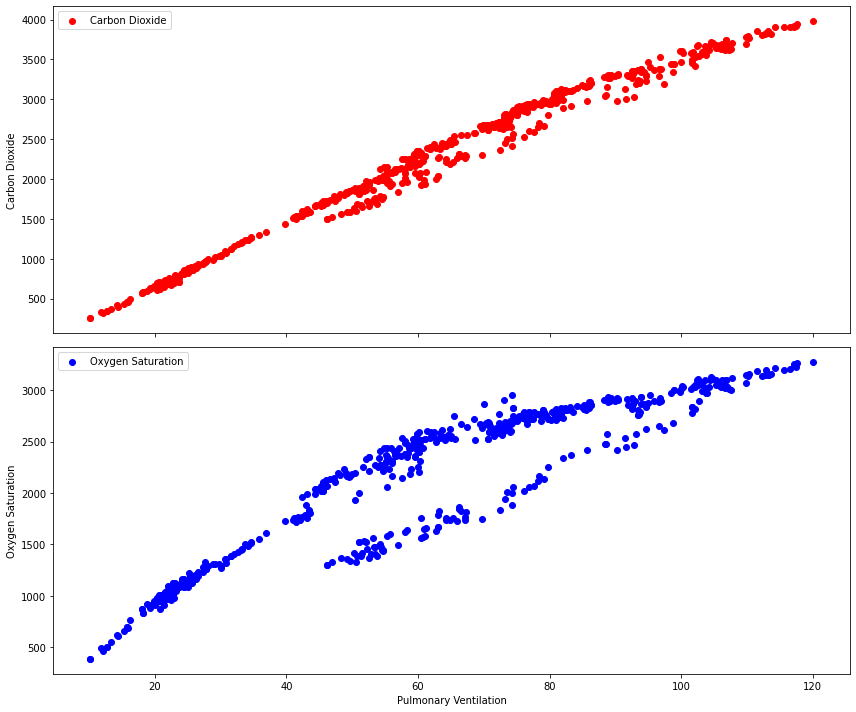

In [88]:
# Method 1: Using matplotlib subplotsdf= athlete_100
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True) # 2 rows, 1 column

axes[0].scatter(np.array(df['VE']), np.array(df['VCO2']), label='Carbon Dioxide', color='red')
axes[0].set_ylabel('Carbon Dioxide')
axes[0].legend()

axes[1].scatter(np.array(df['VE']), np.array(df['VO2']), label='Oxygen Saturation', color='blue')
axes[1].set_ylabel('Oxygen Saturation')
axes[1].set_xlabel('Pulmonary Ventilation')
axes[1].legend()


plt.tight_layout()
plt.show()


### Analysis: 

It is observed from the plots, as the pulmonary ventilation increases, oxygen consumption tends to increase and subsequently production of carbon dioxide increases. During a graded exercise test, as the pulmonary ventilation increases with exercise intensity, the body's carbon dioxide (CO2) production and oxygen consumption (O2) rates also rise proportionally. This is true during accleration but with decceleration of treadmill the rate of relationship between oxygen consumption and carbon dioxide production slightly differed or deviated.

### 71. Create a Funnel chart of Age Category (Child, Teen, Adult and Senior) ?

In [89]:
subject_df['Age Category'].unique()
age_df = subject_df['Age Category'].value_counts()
age_df.values

array([780, 206,   3,   3], dtype=int64)

In [90]:
fig = px.funnel(subject_df, x = age_df.values, y =subject_df['Age Category'].unique(), width = 800, height = 600)
fig.show()

### 72. Visualize different physiological parameters over time for a specific test of an athlete using multiple panels?

In [91]:
#Consider Athelete with ID 100 
athlete_100 = test_df[test_df['ID_test']== '100_1'].reset_index()
athlete_100

index  time  Speed     HR     VO2    VCO2    RR    VE ID_test   ID
0     1192     0    5.0    NaN   386.0   256.0  20.0  10.1   100_1  100
1     1193     2    5.0    NaN   617.0   423.0  26.0  14.2   100_1  100
2     1194     5    5.0   54.0   386.0   255.0  20.0  10.1   100_1  100
3     1195     7    5.0    NaN   488.0   329.0  23.0  11.9   100_1  100
4     1196     9    5.0   91.0   506.0   344.0  25.0  12.8   100_1  100
..     ...   ...    ...    ...     ...     ...   ...   ...     ...  ...
587   1779  1017    5.0  100.0  1297.0  1499.0  27.0  46.2   100_1  100
588   1780  1019    5.0   97.0  1331.0  1523.0  27.0  47.0   100_1  100
589   1781  1021    5.0   94.0  1365.0  1557.0  28.0  48.3   100_1  100
590   1782  1024    5.0   93.0  1419.0  1639.0  26.0  50.3   100_1  100
591   1783  1026    5.0   88.0  1418.0  1645.0  27.0  51.5   100_1  100

[592 rows x 10 columns]

In [92]:
df= athlete_100
df.head()

index  time  Speed    HR    VO2   VCO2    RR    VE ID_test   ID
0   1192     0    5.0   NaN  386.0  256.0  20.0  10.1   100_1  100
1   1193     2    5.0   NaN  617.0  423.0  26.0  14.2   100_1  100
2   1194     5    5.0  54.0  386.0  255.0  20.0  10.1   100_1  100
3   1195     7    5.0   NaN  488.0  329.0  23.0  11.9   100_1  100
4   1196     9    5.0  91.0  506.0  344.0  25.0  12.8   100_1  100

In [93]:
df.drop('index', axis=1, inplace=True)
df.head()

time  Speed    HR    VO2   VCO2    RR    VE ID_test   ID
0     0    5.0   NaN  386.0  256.0  20.0  10.1   100_1  100
1     2    5.0   NaN  617.0  423.0  26.0  14.2   100_1  100
2     5    5.0  54.0  386.0  255.0  20.0  10.1   100_1  100
3     7    5.0   NaN  488.0  329.0  23.0  11.9   100_1  100
4     9    5.0  91.0  506.0  344.0  25.0  12.8   100_1  100

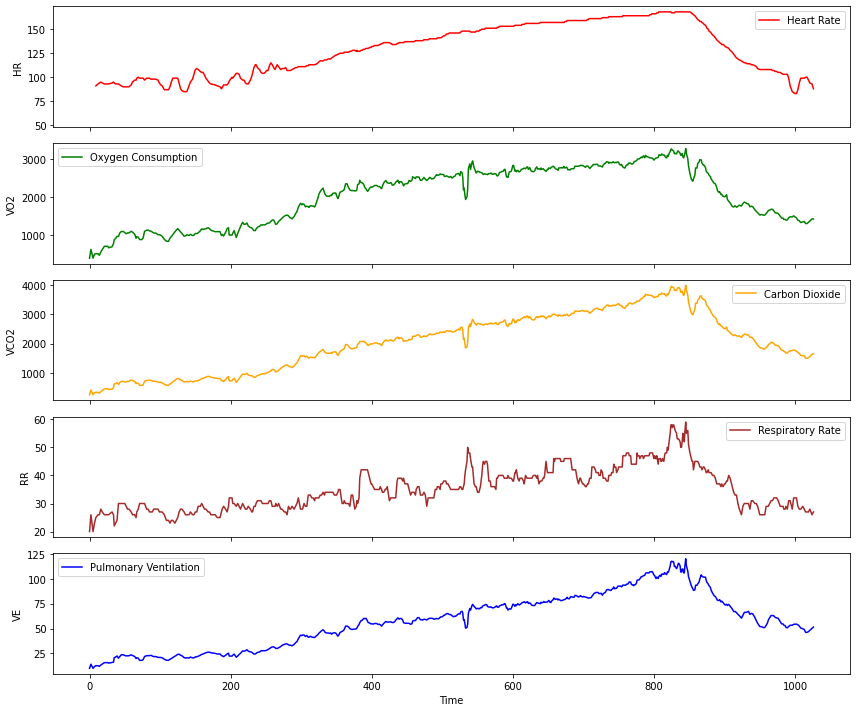

In [94]:
# Method 1: Using matplotlib subplots
df= athlete_100

fig, axes = plt.subplots(5, 1, figsize=(12, 10), sharex=True) # 5 rows, 1 column

axes[0].plot(np.array(df['time']), np.array(df['HR']), label='Heart Rate', color='red')
axes[0].set_ylabel('HR')
axes[0].legend()

axes[1].plot(np.array(df['time']), np.array(df['VO2']), label='Oxygen Consumption', color='green')
axes[1].set_ylabel('VO2')
axes[1].legend()

axes[2].plot(np.array(df['time']), np.array(df['VCO2']), label='Carbon Dioxide', color='orange')
axes[2].set_ylabel('VCO2')
axes[2].legend()

axes[3].plot(np.array(df['time']), np.array(df['RR']), label='Respiratory Rate', color='brown')
axes[3].set_ylabel('RR')
axes[3].legend()

axes[4].plot(np.array(df['time']), np.array(df['VE']), label='Pulmonary Ventilation', color='blue')
axes[4].set_ylabel('VE')
axes[4].set_xlabel('Time')
axes[4].legend()


plt.tight_layout()
plt.show()



### 73. Print first 10 records of the subject_info based on ID, without using head() method.

In [95]:
# using iloc we can access the first 10 rows/ records of a dataframe
subject_df.iloc[: 11]    

Age  Weight  Height  Humidity  Temperature     Sex   ID ID_test  \
0   10.8    48.8   163.0      39.0         20.7  Female  543   543_1   
1   11.8    41.0   150.0      41.0         22.3  Female   11    11_1   
2   12.2    46.0   160.0      37.0         21.5    Male  829   829_1   
3   13.2    71.0   190.0      49.0         23.8  Female  284   284_1   
4   13.7    53.8   169.7      40.0         25.3    Male  341   341_1   
5   13.8    53.4   171.0      42.0         24.4    Male  341   341_2   
6   14.0    46.0   160.0      40.0         25.3    Male  343   343_1   
7   14.1    50.0   168.9      42.0         24.2    Male  330   330_1   
8   14.1    47.2   160.2      40.0         25.2    Male  338   338_1   
9   14.1    49.7   160.1      40.0         25.8    Male  339   339_1   
10  14.1    46.6   161.5      41.0         26.5    Male  343   343_5   

   Age Category   BSA bsa_category  
0         Child  1.49          Low  
1         Child  1.31          Low  
2         Child  1.43          Low  
3          Teen  1.94      Average  
4          Teen  1.59          Low  
5          Teen  1.59          Low  
6          Teen  1.43          Low  
7          Teen  1.53          Low  
8          Teen  1.45          Low  
9          Teen  1.49          Low  
10         Teen  1.45          Low

### 74. Determine the treadmill speed range and age range in which you observe the highest average heart rate.

In [96]:
# Min and Max speed for each ID_test is the treadmill speed range.

# ID_test, Minspeed, Maxspeed, Minage, Maxage, max_averageHR, 
test_df

time  Speed     HR     VO2    VCO2    RR    VE ID_test  ID
0          0    0.0    NaN   198.0   233.0  15.0   8.9     1_1   1
1          4    0.0    NaN   286.0   328.0  16.0  10.9     1_1   1
2         10    0.0    NaN   245.0   258.0  10.0   7.9     1_1   1
3         14    0.0    NaN   234.0   252.0  11.0   8.2     1_1   1
4         19    0.0    NaN   250.0   271.0  12.0   8.9     1_1   1
...      ...    ...    ...     ...     ...   ...   ...     ...  ..
575082   890    5.0  109.0  1124.0  1007.0  28.0  38.1   99_54  99
575083   892    5.0  109.0  1097.0   962.0  27.0  36.9   99_54  99
575084   894    5.0  108.0  1102.0   942.0  27.0  36.1   99_54  99
575085   897    5.0  107.0  1100.0   946.0  27.0  36.1   99_54  99
575086   899    5.0  107.0  1053.0   901.0  27.0  34.7   99_54  99

[575087 rows x 9 columns]

In [110]:
test_df.groupby(['ID_test','Speed'])['HR'].mean()

ID_test  Speed
100_1    5.0      111.106509
         5.1       92.000000
         5.2       91.000000
         5.3       89.750000
         5.4       92.000000
                     ...    
9_1      12.6     147.600000
         12.7     148.750000
         12.8     150.600000
         12.9     151.600000
         13.0     166.000000
Name: HR, Length: 82469, dtype: float64

In [ ]:
participants_max_vo2 = pd.merge(testcount, vo2max, on='ID')
participants_max_vo2.head()

In [120]:
avg_hr = test_df.groupby(['ID_test'])['HR'].mean().reset_index()
avg_hr.columns = ['ID_test', 'Avg_HR']
#avg_hr

subject_age = subject_df[['ID_test', 'Age', 'Age Category']]
#subject_age

age_avg_hr = pd.merge(avg_hr, subject_age, on='ID_test')
age_avg_hr
#age_range_max_

ID_test      Avg_HR   Age
0     100_1  133.684211  42.1
1     101_1  154.113924  41.0
2     102_1  167.868347  31.9
3     103_1  153.094643  33.0
4     104_1  139.322751  31.4
..      ...         ...   ...
987    98_1  130.848696  38.6
988    99_1  129.361552  39.1
989   99_47  137.295302  41.4
990   99_54  143.697880  41.7
991     9_1  156.112128  24.5

[992 rows x 3 columns]

In [100]:
subject_df

Age  Weight  Height  Humidity  Temperature     Sex   ID ID_test  \
0    10.8    48.8   163.0      39.0         20.7  Female  543   543_1   
1    11.8    41.0   150.0      41.0         22.3  Female   11    11_1   
2    12.2    46.0   160.0      37.0         21.5    Male  829   829_1   
3    13.2    71.0   190.0      49.0         23.8  Female  284   284_1   
4    13.7    53.8   169.7      40.0         25.3    Male  341   341_1   
..    ...     ...     ...       ...          ...     ...  ...     ...   
987  59.1    64.7   172.0      38.0         24.4    Male  856   856_2   
988  59.7    65.2   172.0      51.0         16.8    Male  856   856_3   
989  61.3   102.0   185.0      56.0         20.5    Male  390   390_1   
990  61.6    74.0   169.0      46.0         23.9    Male  596   596_1   
991  63.0    83.5   171.5      48.0         22.2    Male  296   296_1   

    Age Category   BSA bsa_category  
0          Child  1.49          Low  
1          Child  1.31          Low  
2          Child  1.43          Low  
3           Teen  1.94      Average  
4           Teen  1.59          Low  
..           ...   ...          ...  
987        Adult  1.76      Average  
988        Adult  1.76      Average  
989       Senior  2.29         High  
990       Senior  1.86      Average  
991       Senior  1.99      Average  

[992 rows x 11 columns]

In [ ]:
#number of test taken by participants
testcount = test_df.groupby('ID')['ID_test'].nunique().reset_index()
testcount.columns = ['ID', 'testCounts']

### 75. Identify subjects whose heart rate (HR) is consistently above their age group’s 75th percentile.

### 76. List the participants ID and test _ID who started their warm up with speed less than 5km/h ?

In [154]:
# Filter rows where speed less than 5 km/h
speed5_df = test_df[test_df['Speed'] < 5]
speed5_df.head(10)

time  Speed    HR    VO2   VCO2    RR    VE ID_test  ID
0     0    0.0   NaN  198.0  233.0  15.0   8.9     1_1   1
1     4    0.0   NaN  286.0  328.0  16.0  10.9     1_1   1
2    10    0.0   NaN  245.0  258.0  10.0   7.9     1_1   1
3    14    0.0   NaN  234.0  252.0  11.0   8.2     1_1   1
4    19    0.0   NaN  250.0  271.0  12.0   8.9     1_1   1
5    22    0.0  61.0  247.0  271.0  13.0   9.1     1_1   1
6    26    0.0  62.0  240.0  264.0  13.0   9.1     1_1   1
7    29    0.0  63.0  252.0  275.0  14.0   9.3     1_1   1
8    35    0.0  64.0  252.0  275.0  14.0   9.3     1_1   1
9    36    0.0  64.0  259.0  289.0  18.0  10.3     1_1   1

In [155]:
filtered_df = speed5_df.drop(columns = ['HR','VO2','VCO2', 'RR', 'VE'])
#filtered_df.head()

In [156]:
#List of participants ID and ID_test with warm up speed less than 5km/h
df = filtered_df.drop_duplicates(subset=['ID', 'ID_test','Speed'])
df.head(10) #601 rows total

time  Speed ID_test   ID
0          0    0.0     1_1    1
30       112    4.9     1_1    1
34003   1076    0.0   138_1  138
50402      0    0.0   163_1  163
81158   1070    0.0   201_1  201
87045     32    3.0   213_1  213
87076    115    3.5   213_1  213
87105    195    4.0   213_1  213
87123    240    4.5   213_1  213
101128   617    0.0   235_1  235

In [157]:
# unique participants ID and test _ID
unique_df = df.drop_duplicates(subset=['ID', 'ID_test'])
unique_df.head(10) #315 rows

time  Speed ID_test   ID
0          0    0.0     1_1    1
34003   1076    0.0   138_1  138
50402      0    0.0   163_1  163
81158   1070    0.0   201_1  201
87045     32    3.0   213_1  213
101128   617    0.0   235_1  235
106085   936    0.0   244_1  244
106718  1264    0.0   245_1  245
107521     0    0.0   247_1  247
108606     0    0.0   249_1  249

### 77. Calculate the mean VO2 max for male and female athletes in the Get Phase.

In [158]:
Speed  = test_df.groupby('ID')
# taking max speed of the ID
max_speed = Speed['Speed'].max().reset_index()
max_speed.columns = ['ID', 'MaxSpeed']
max_speed['Sex'] = subject_i['Sex']
max_speed.head()

ID  MaxSpeed     Sex
0   1      18.1  Female
1   2      16.3  Female
2   3      18.1    Male
3   4      16.2  Female
4   5      14.4    Male

In [159]:
VO2_max = test_df.groupby('ID_test')
VO2_max_df = VO2_max['VO2'].max().reset_index()
VO2_max_df.columns = ['ID_test', 'Max_VO2']
VO2_max_df['Sex'] = subject_i['Sex']
VO2_max_df.head()

ID_test  Max_VO2     Sex
0   100_1   3272.0  Female
1   101_1   3093.0  Female
2   102_1   3935.0    Male
3   103_1   3861.0  Female
4   104_1   3568.0    Male

In [160]:
# FINAL: The mean VO2 max for male and female athletes in the Get Phase.
gender_mean_VO2_max  = VO2_max_df.groupby('Sex')['Max_VO2'].mean()
gender_mean_VO2_max

Sex
Female    3491.813793
Male      3572.473684
Name: Max_VO2, dtype: float64

### 78. If you consider cool down time as the recovery period after reaching peak speed, display the participant details who has taken the longest Cool Down time.


In [112]:
#minimum time at minimum speed---> warmup
#max time , max speed
#maximum time at minimim speed ---> cool dowm
#longest Cool Down time         
           


### 79. Identify the athlete who recorded the highest treadmill speed during the tests.

In [161]:
maxspeed_row_id = test_df['Speed'].idxmax()
maxspeed_row = test_df.iloc[maxspeed_row_id]
#print(maxspeed_row)
print("The ID of the athlete who recorded the highest treadmill speed during the test is", maxspeed_row['ID'])

The ID of the athlete who recorded the highest treadmill speed during the test is 431


### 80. Show the oxygen consumption trend analysis among women athletes across different age groups 